# 1.1.2 Simple linear regression

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import poisson

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Links: https://priceonomics.com/the-discovery-of-statistical-regression/
Links: https://www.youtube.com/watch?v=o_IP63-VtFA

## 1.1.2.1 El modelo forma I

$$ y = \beta_{0} + \beta_{1}x + e $$

con los supuestos:

- E(e) = 0
- Var(e) = $\sigma^2$ -> varianza constante
- e $\sim$ Normal
- Errores incorrelacionados

## 1.1.2.2 El modelo forma I

$$ 𝑦 \sim 𝑁(\mu, \sigma^2) $$

con los supuestos:

- $\mu = \beta_{0} + \beta_{1}x $
- $\sigma^2$ varianza constante

## 1.1.2.3 Distribución de 𝑦 dado 𝑥

Como:

$$ 𝑦 = \beta_{0} + \beta_{1}x + e $$

entonces:

- $𝐸(𝑦|𝑥) = \beta_{0} + \beta_{1}x $
- $𝑉𝑎𝑟(𝑦|𝑥) = 𝑉𝑎𝑟(\beta_{0} + \beta_{1}x + e) = \sigma^2 $

## 1.1.2.4 Parámetros del modelo

- $\beta_{0}$: Intercepto
- $\beta_{1}$: Coeficiente de 𝑥
- $\sigma^2$: Varianza de los errores

## 1.1.2.5 Estimación de parámetros

- Estimación por Mínimos Cuadrados
- Estimación por Máxima Verosimilitud

## 1.1.2.6 Modelo ajustado

$$ \hat{y} = \beta_{0} + \beta_{1}x $$

## 1.1.2.7 Residuales

Un residual (o error) es la diferencia entre el valor observado $𝑦_𝑖$ y el valor predicho o ajustado $\hat{𝑦_𝑖}$

$$ e_{i} = y_{i} - \hat{y_{i}} $$

Los residuales se utilizan para estudiar la adecuación del modelo a los supuestos

## 1.1.2.8 Estimación de Varianza

Estimar $\sigma^2$ es necesario para construir intervalos de confianza y realizar pruebas de hipótesis para
los parámetros

$$ \sigma^2 = \frac{𝑆𝑆_{𝑅𝑒𝑠}}{𝑛-2} ≡ 𝑀𝑆_{𝑅𝑒𝑠} $$ 

donde $𝑆𝑆_{𝑅𝑒𝑠}$ corresponde a la suma de cuadrados de los residuales

## 1.1.2.9 Calcular los Residuales

- Forma 1

$$ 𝑆𝑆_{𝑅𝑒𝑠} = \sum_{𝑖=1}^{𝑛} 𝑒_𝑖^2 $$

- Forma 2

$$ 𝑆𝑆𝑇 = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖^2 − n\bar{𝑦}^2 $$

$$ 𝑆𝑆_{𝑅𝑒𝑠} = 𝑆𝑆_𝑇 − \hat{\beta_{1}} 𝑆_{𝑥𝑦} $$ 

## 1.1.2.10 Coeficiente de correlación lineal

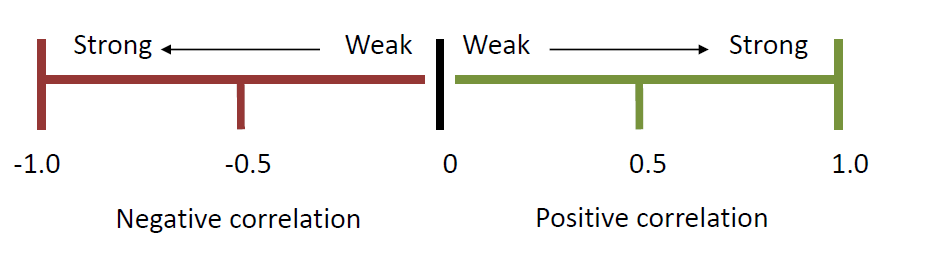

$$ 𝑟 = \frac{\sum_{𝑖=1}^{𝑛} (𝑥_𝑖 − \bar{𝑥}) (𝑦_i - \bar{y}) }{ \sqrt{\sum_{𝑖=1}^{𝑛} (𝑥_𝑖 − \bar{𝑥})^2  \sum_{𝑖=1}^{𝑛} (𝑦_i - \bar{y})^2 }} 

## 1.1.2.11 Ejemplo

Resistencia de soldadura

In [28]:
y_machine = [2158.70,1678.15,2316.00,2061.30,2207.50,1708.30,1784.70,2575.00,2357.90,2256.70,2165.20,2399.55,
             1779.80,2336.75,1765.30,2053.50,2414.40,2200.50,2654.20,1753.70]

x_machine = [15.50,23.75,8.00,17.00,5.50,19.00,24.00,2.50,7.50,11.00,13.00,3.75,25.00,9.75,22.00,18.00,6.00,
             12.50,2.00,21.50]

# Calcular la correlación lineal
correlation_matrix = np.corrcoef(x_machine, y_machine)
correlation = correlation_matrix[0, 1]

y_machine = np.array(y_machine)
x_machine = np.array(x_machine).reshape(-1, 1)

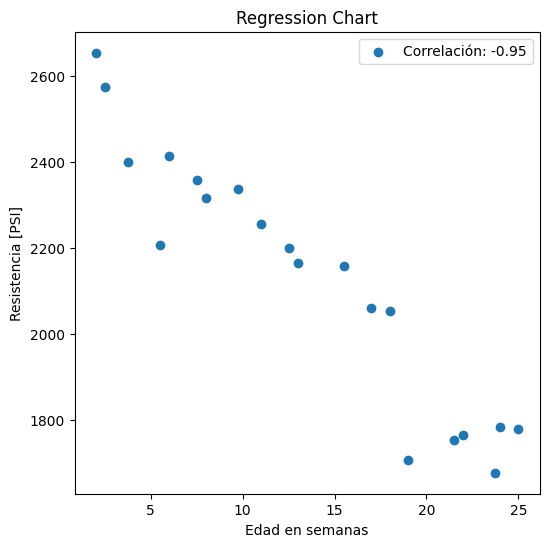

In [29]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x_machine, y_machine, label=f'Correlación: {correlation:.2f}')
plt.title('Regression Chart')
plt.xlabel('Edad en semanas')
plt.ylabel('Resistencia [PSI]')
plt.legend()
plt.show()

In [30]:
# Lineal regression
modelo_regresion = LinearRegression().fit(x_machine, y_machine)
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

linea_regresion = pendiente * x_machine + intercepto

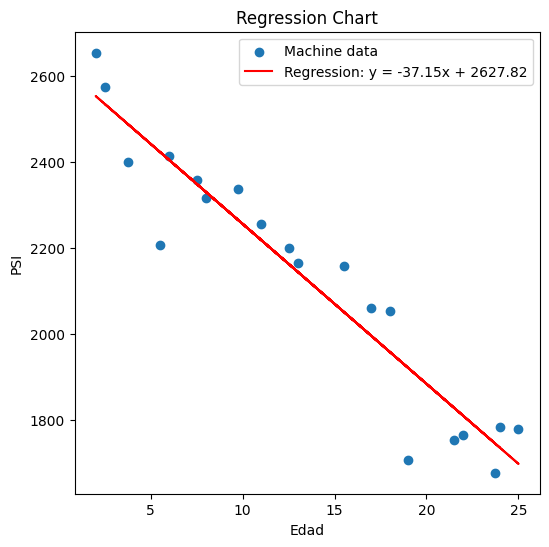

In [31]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x_machine, y_machine, label='Machine data')
plt.plot(x_machine, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('Edad')
plt.ylabel('PSI')
plt.legend()
plt.show()

Model: 

$$ Resistencia = \beta_{0} + \beta_{1} * Edad + e $$

$$ S_{xy} = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖 𝑥_𝑖 − \frac{(\sum_{𝑖=1}^{𝑛} x_i) (\sum_{𝑖=1}^{𝑛} y_i)}{n} = 528492.64 − \frac{267.25 - 42627.15}{20} = −41112.65 $$

$$ S_{xx} = \sum_{𝑖=1}^{𝑛} 𝑥_𝑖^2 − \frac{(\sum_{𝑖=1}^{𝑛} x_i)^2}{n} = 4677.69 - \frac{71422.56}{20} = 1106.56 $$ 

$$ \beta_{1} = \frac{S_{xy}}{S_{xx}} = \frac{528492.64}{1106.56} = −37.15 $$

$$ \beta_{0} = \bar{y} \beta_{1} \bar{x} = 2131.35 − (−37.15)13.36 = 2627.82 $$

$$ 𝑆𝑆_{𝑇} = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖^2 − 𝑛 \bar{𝑦}^2 = 92547433.45 − 20 * 4542685 = 1693738 $$

$$ 𝑆𝑆_{𝑅𝑒𝑠} = 𝑆𝑆_{𝑇} − \beta_{1} 𝑆_{𝑥𝑦} = 1693738 − (−37.15)(−41112.65) = 166402.65 $$

$$ \hat{\sigma}^2 = \frac{𝑆𝑆_{𝑅𝑒𝑠}}{𝑛−2} = \frac{166402.65}{20−2} = 9244.59 {psi}^2 $$

$$ \hat{\sigma} = 96.15 psi $$

Modelo estimado:

$$ \hat{Resistencia} = 2627.82 − 37.15 * Edad $$

Resoluciones: 

- 2627.82 psi es la resistencia esperada para una soldadura nueva.
- Por cada semana que envejezca la soldadura se espera una disminución media en la resistencia de 37.15 psi.

¿Cuál será la resistencia media cuando la edad de la soldadura es 10 semanas?

In [32]:
y_pred = modelo_regresion.predict([[10]])
y_pred

array([2256.28644955])

Para una soldadura de 10 semanas se espera que la resistencia media sea de 2256.28 psi.

In [33]:
y_pred = modelo_regresion.predict(x_machine)

df_results = pd.DataFrame({'X': x_machine.flatten(), 'y': y_machine.flatten(), 'pred': y_pred.flatten()})
df_results['error'] = df_results['y'] - df_results['pred']

df_results

,X,y,pred,error
0,15.50,2158.70,2051.941699,106.758301
1,23.75,1678.15,1745.424574,-67.274574
2,8.00,2316.00,2330.593631,-14.593631
3,17.00,2061.30,1996.211313,65.088687
4,5.50,2207.50,2423.477609,-215.977609
5,19.00,1708.30,1921.904131,-213.604131
6,24.00,1784.70,1736.136176,48.563824
7,2.50,2575.00,2534.938382,40.061618
8,7.50,2357.90,2349.170427,8.729573
9,11.00,2256.70,2219.132859,37.567141


In [34]:
df_results['error'].describe()

count    2.000000e+01
mean     1.705303e-13
std      9.354280e+01
min     -2.159776e+02
25%     -5.067616e+01
50%      2.873593e+01
75%      6.661030e+01
max      1.067583e+02
Name: error, dtype: float64

In [35]:
mse = mean_squared_error(y_machine, y_pred)
mse

8312.742903349057

In [36]:
rse = np.sqrt(mse)
rse

91.17424473692698

In [37]:
X_train = sm.add_constant(x_machine, prepend=True)
modelo = sm.OLS(endog=y_machine, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.64e-10
Time:                        15:37:08   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.8224     44.184     59.475      0.0

## 1.1.2.12 Activity

$ y_i \sim N (\mu_i, \sigma^2) \ con \ i=1,\cdots,n$

$ \mu_i = 4 + 5x_i $

$ \sigma^2=9 $

$ x_i \sim 𝑃𝑜𝑖𝑠𝑠𝑜𝑛(\lambda=5) $

1. Simule un conjunto de datos con $𝑛=5$ y estime los parámetros del modelo.

2. Simule 100 conjuntos de datos con $𝑛=5$ estime los parámetros del modelo y almacene todas las 100 estimaciones para cada uno de los tres parámetros Calcule las medias de los estimadores.

3. Repita el ejercicio anterior para 𝑛=5,10,15,20,30,50,100,500y calcule el error cuadrático medio para cada
estimador.

¿Qué tan cerca están las estimaciones del verdadero vector de parámetros? <br>
¿Qué tan bien se ajusta esta ecuación a los datos? <br>
¿Es probable que el modelo sea útil como predictor? <br>
¿Se viola alguna de las hipótesis básicas (como varianza constante y errores no correlacionados)? y en caso
afirmativo, ¿qué tan grave es eso?

In [38]:
# Numero de puntos
n = 5
# Varianza
var = 9
# Parámetro lambda para la distribución de Poisson
lmbda = 3.0

# Generar 5 números aleatorios con distribución de Poisson
x = poisson.rvs(lmbda, size=n)
# Calcular los estadisticos
media = -4+5*x
# Generar 5 números aleatorios con distribución de Normal con la media y la varianza
y = np.random.normal(loc=media, scale=np.sqrt(var), size=n)

# Lineal regression
modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

linea_regresion = pendiente * x + intercepto

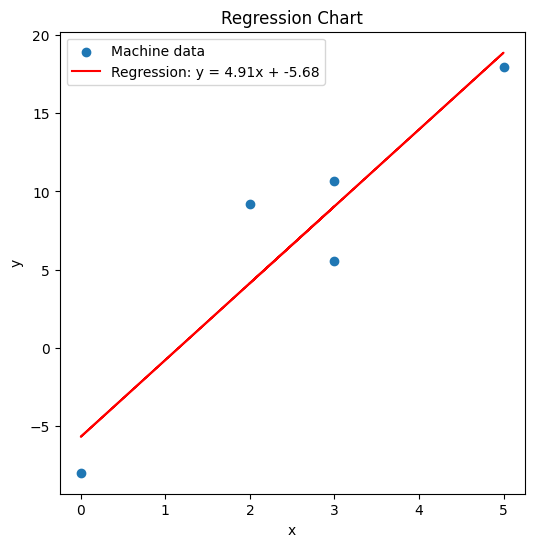

In [39]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Machine data')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [40]:
beta0 = []
beta1 = []

for i in range(100):

    # Generar 5 números aleatorios con distribución de Poisson
    x = poisson.rvs(lmbda, size=n)
    # Calcular los estadisticos
    media = -4+5*x
    # Generar 5 números aleatorios con distribución de Normal con la media y la varianza
    y = np.random.normal(loc=media, scale=np.sqrt(var), size=n)

    # Lineal regression
    modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
    beta0.append(modelo_regresion.coef_[0])
    beta1.append(modelo_regresion.intercept_)

mean_beta0 = np.mean(beta0)
mean_beta1 = np.mean(beta1)

linea_regresion = mean_beta0 * x + mean_beta1

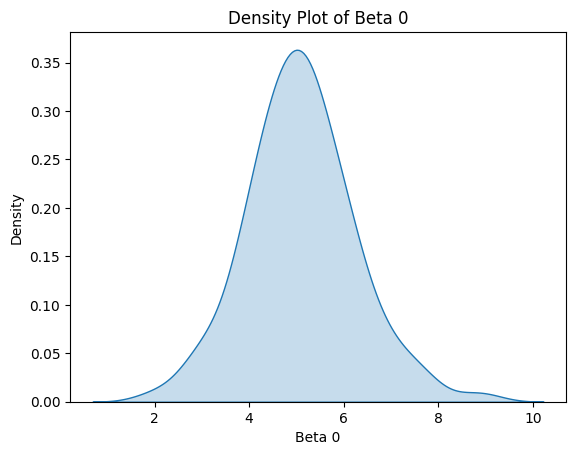

In [49]:
sns.kdeplot(beta0, shade=True)
plt.xlabel('Beta 0')
plt.ylabel('Density')
plt.title('Density Plot of Beta 0')
plt.show()

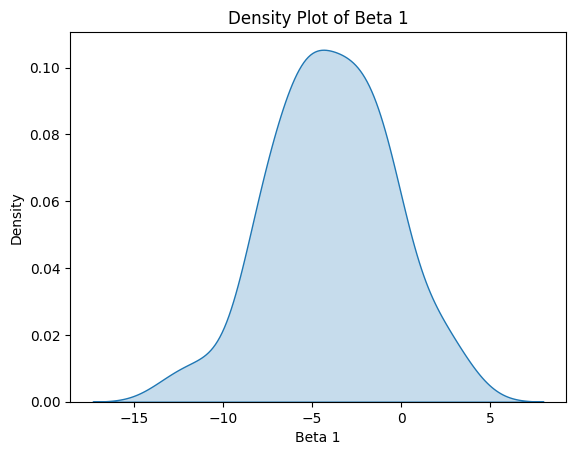

In [51]:
sns.kdeplot(beta1, shade=True)
plt.xlabel('Beta 1')
plt.ylabel('Density')
plt.title('Density Plot of Beta 1')
plt.show()

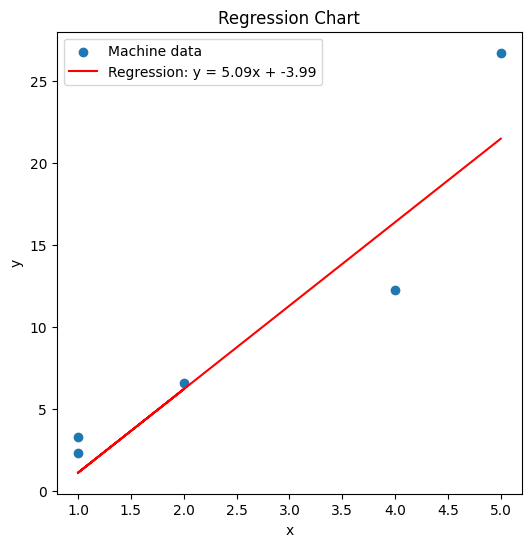

In [43]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Machine data')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {mean_beta0:.2f}x + {mean_beta1:.2f}')
plt.title('Regression Chart')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [62]:
y_pred = modelo_regresion.predict(x.reshape(-1, 1))
# Calcula los residuales
residuales = y - y_pred
ssr = np.sum(residuales**2)
ssr

46.17368495084565

In [69]:
ssr/(5 - 2)

15.391228316948549

In [42]:
print('ok_')

ok_
